In [1]:
%matplotlib inline

In [2]:
import sys
sys.dont_write_bytecode = True
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
from ggplot import *
from dataMethods import *
from testRuns import *
import pandas as pd
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
dataColumns = ['lHR', 'rHR', 'wHR', 'lK', 'rK', 'wK', 'lfaR', 'rfaR', 'wfaR', 'lHitRT', 'rHitRT', 'wHitRT', 'lFaRT'
               , 'rFaRT', 'wFaRT', 'ldP', 'rdP', 'wdP', 'lCrit', 'rCrit', 'wCrit']

In [4]:
def createDF(testRuns):
    data = pd.DataFrame()
    i = 0
    for (s,r) in testRuns:
        stats = extractPerformance(s,r,'stim1')
        leftHRs = stats['lHRs']
        rightHRs = stats['rHRs']
        wholeHRs = stats['wHRs']
        leftKs = stats['lKs']
        rightKs = stats['rKs']
        wholeKs = stats['wKs']
        leftfaRates = stats['lfaRates']
        rightfaRates = stats['rfaRates']
        wholefaRates = stats['wfaRates']
        leftHitRTs = stats['lHitRTs']
        rightHitRTs = stats['rHitRTs']
        wholeHitRTs = stats['wHitRTs']
        leftFaRTs = stats['lFaRTs']
        rightFaRTs = stats['rFaRTs']
        wholeFaRTs = stats['wFaRTs']
        leftdPs = stats['ldPs']
        rightdPs = stats['rdPs']
        wholedPs = stats['wdPs']
        leftCrits = stats['lCrits']
        rightCrits = stats['rCrits']
        wholeCrits = stats['wCrits']
        for key in HFconds:
            row = pd.Series([leftHRs[key],rightHRs[key], wholeHRs[key], leftKs[key], rightKs[key],
                             wholeKs[key], leftfaRates[key], rightfaRates[key], wholefaRates[key],
                            leftHitRTs[key], rightHitRTs[key], wholeHitRTs[key], leftFaRTs[key], 
                              rightFaRTs[key], wholeFaRTs[key], leftdPs[key], rightdPs[key], 
                              wholedPs[key], leftCrits[key], rightCrits[key], wholeCrits[key]],
                            name = str(i), index=dataColumns)
            row['targs'] = str(HFconds[key][0])
            row['dists'] = str(HFconds[key][1])
            row['subj'] = int(s)
            row['run'] = int(r)
            data = data.append(row)
            i += 1
    return data   

In [5]:
lstimData = createDF(lstimTestRuns)
rstimData = createDF(rstimTestRuns)
shamData = createDF(shamTestRuns)

In [6]:
lstimData[lstimData['subj']==3]

,dists,lCrit,lFaRT,lHR,lHitRT,lK,ldP,lfaR,rCrit,rFaRT,...,run,subj,targs,wCrit,wFaRT,wHR,wHitRT,wK,wdP,wfaR
6,0,-0.169312,0.484797,0.8125,0.501730,0.735294,1.435669,0.291667,-0.270027,0.501730,...,2.0,3.0,1,0.571942,NaN,0.84375,0.501293,0.843750,3.163865,0.0000
7,1,0.040138,0.484340,0.8125,0.484860,0.775000,1.854568,0.166667,0.305147,0.484860,...,2.0,3.0,1,0.875812,NaN,0.65625,0.484860,0.656250,2.556125,0.0000
8,2,0.291836,0.451533,0.7500,0.518307,0.720930,1.932651,0.104167,0.581633,0.518307,...,2.0,3.0,1,1.037731,NaN,0.53125,0.501503,0.531250,2.232287,0.0000
9,0,0.258590,0.551152,0.5625,0.501665,0.833333,0.831800,0.250000,0.211477,0.517500,...,2.0,3.0,2,0.648459,0.659774,0.59375,0.501665,1.133333,1.771323,0.0625
10,1,0.443573,0.468140,0.5000,0.593161,0.769231,0.887147,0.187500,0.405055,0.593161,...,2.0,3.0,2,1.037731,NaN,0.53125,0.518135,1.062500,2.232287,0.0000
11,2,0.367917,0.551606,0.6250,0.526449,1.121951,1.373112,0.145833,0.484764,0.526449,...,2.0,3.0,2,1.037731,NaN,0.53125,0.534661,1.062500,2.232287,0.0000


(0, 1.8)

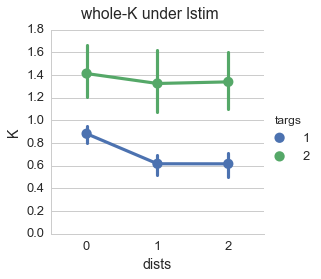

In [7]:
lstimWKPlot = sns.factorplot(data=lstimData,x='dists',y='wK',hue='targs')
lstimWKPlot.fig.suptitle('whole-K under lstim')
lstimWKPlot.set_axis_labels('dists', 'K')
lstimWKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 1.8)

(0, 1.8)

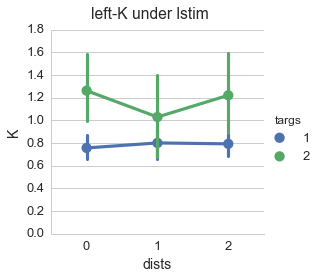

In [8]:
lstimLKPlot = sns.factorplot(data=lstimData,x='dists',y='lK',hue='targs')
lstimLKPlot.fig.suptitle('left-K under lstim')
lstimLKPlot.set_axis_labels('dists', 'K')
lstimLKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 1.8)

(0, 1.8)

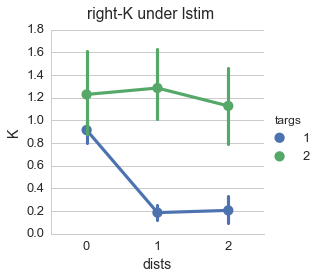

In [9]:
lstimRKPlot = sns.factorplot(data=lstimData,x='dists',y='rK',hue='targs')
lstimRKPlot.fig.suptitle('right-K under lstim')
lstimRKPlot.set_axis_labels('dists', 'K')
lstimRKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 1.8)

(1, 3.5)

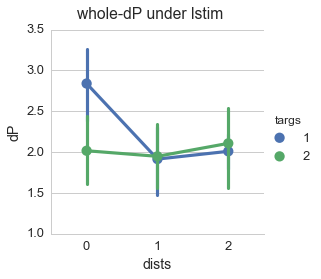

In [10]:
lstimWdPPlot = sns.factorplot(data=lstimData,x='dists',y='wdP',hue='targs')
lstimWdPPlot.fig.suptitle('whole-dP under lstim')
lstimWdPPlot.set_axis_labels('dists', 'dP')
lstimWdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(1, 3.5)

(0, 2.5)

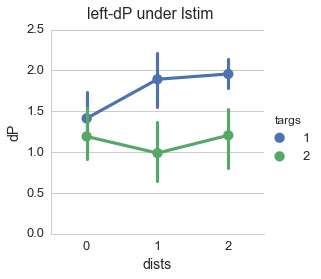

In [11]:
lstimLdPPlot = sns.factorplot(data=lstimData,x='dists',y='ldP',hue='targs')
lstimLdPPlot.fig.suptitle('left-dP under lstim')
lstimLdPPlot.set_axis_labels('dists', 'dP')
lstimLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(0, 2.5)

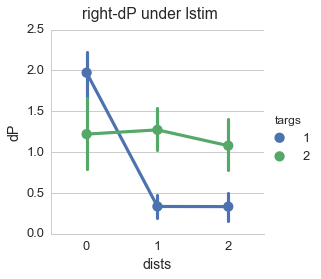

In [12]:
lstimRdPPlot = sns.factorplot(data=lstimData,x='dists',y='rdP',hue='targs')
lstimRdPPlot.fig.suptitle('right-dP under lstim')
lstimRdPPlot.set_axis_labels('dists', 'dP')
lstimRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(0, 1.8)

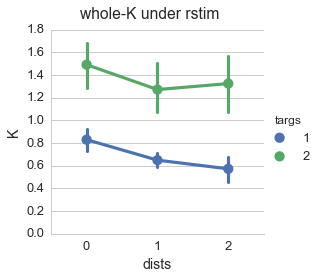

In [13]:
rstimWKPlot = sns.factorplot(data=rstimData,x='dists',y='wK',hue='targs')
rstimWKPlot.fig.suptitle('whole-K under rstim')
rstimWKPlot.set_axis_labels('dists', 'K')
rstimWKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 1.8)

(0, 1.8)

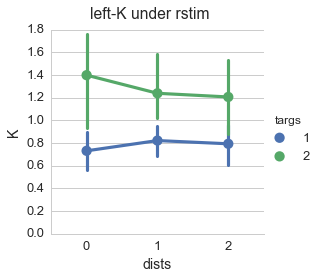

In [14]:
rstimLKPlot = sns.factorplot(data=rstimData,x='dists',y='lK',hue='targs')
rstimLKPlot.fig.suptitle('left-K under rstim')
rstimLKPlot.set_axis_labels('dists', 'K')
rstimLKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 1.8)

(0, 1.8)

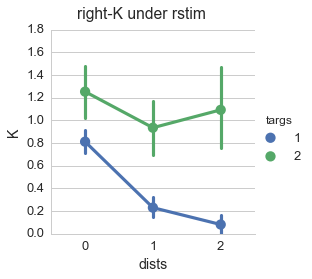

In [15]:
rstimRKPlot = sns.factorplot(data=rstimData,x='dists',y='rK',hue='targs')
rstimRKPlot.fig.suptitle('right-K under rstim')
rstimRKPlot.set_axis_labels('dists', 'K')
rstimRKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 1.8)

(1, 3.5)

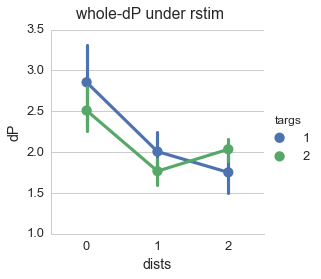

In [16]:
rstimWdPPlot = sns.factorplot(data=rstimData,x='dists',y='wdP',hue='targs')
rstimWdPPlot.fig.suptitle('whole-dP under rstim')
rstimWdPPlot.set_axis_labels('dists', 'dP')
rstimWdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(1, 3.5)

(0, 2.5)

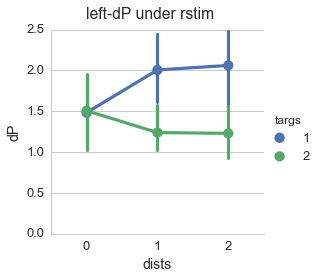

In [17]:
rstimLdPPlot = sns.factorplot(data=rstimData,x='dists',y='ldP',hue='targs')
rstimLdPPlot.fig.suptitle('left-dP under rstim')
rstimLdPPlot.set_axis_labels('dists', 'dP')
rstimLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(0, 2.5)

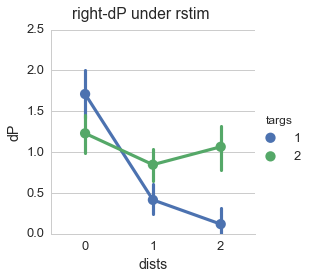

In [18]:
rstimRdPPlot = sns.factorplot(data=rstimData,x='dists',y='rdP',hue='targs')
rstimRdPPlot.fig.suptitle('right-dP under rstim')
rstimRdPPlot.set_axis_labels('dists', 'dP')
rstimRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(1, 3.5)

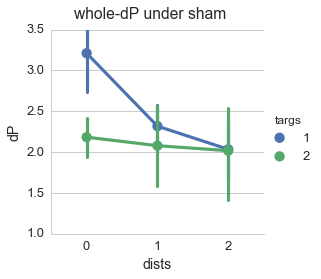

In [19]:
shamWdPPlot = sns.factorplot(data=shamData,x='dists',y='wdP',hue='targs')
shamWdPPlot.fig.suptitle('whole-dP under sham')
shamWdPPlot.set_axis_labels('dists', 'dP')
shamWdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(1, 3.5)

(0, 2.5)

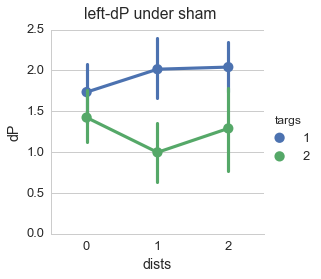

In [20]:
shamLdPPlot = sns.factorplot(data=shamData,x='dists',y='ldP',hue='targs')
shamLdPPlot.fig.suptitle('left-dP under sham')
shamLdPPlot.set_axis_labels('dists', 'dP')
shamLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(0, 2.5)

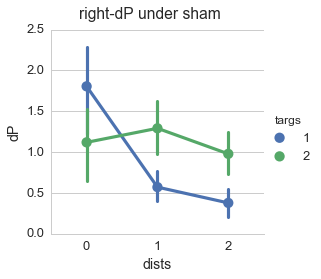

In [21]:
shamRdPPlot = sns.factorplot(data=shamData,x='dists',y='rdP',hue='targs')
shamRdPPlot.fig.suptitle('right-dP under sham')
shamRdPPlot.set_axis_labels('dists', 'dP')
shamRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

In [22]:
lData = lstimData.reset_index()
rData = rstimData.reset_index()
sData = shamData.reset_index()
normData = pd.DataFrame()
normData['lstimLK'] = lData['lK'].sub(sData['lK'], axis=0)
normData['lstimRK'] = lData['rK'].sub(sData['rK'], axis=0)
normData['rstimLK'] = rData['lK'].sub(sData['lK'], axis=0)
normData['rstimRK'] = rData['rK'].sub(sData['rK'], axis=0)
normData['lstimLdP'] = lData['ldP'].sub(sData['ldP'], axis=0)
normData['lstimRdP'] = lData['rdP'].sub(sData['rdP'], axis=0)
normData['rstimLdP'] = rData['ldP'].sub(sData['ldP'], axis=0)
normData['rstimRdP'] = rData['rdP'].sub(sData['rdP'], axis=0)
normData['targs'] = rData['targs']
normData['dists'] = rData['dists']

(-1, 1)

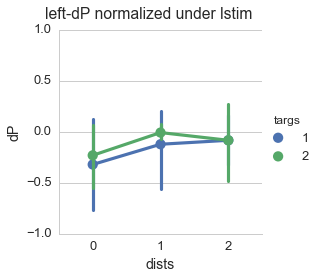

In [23]:
lnormLdPPlot = sns.factorplot(data=normData,x='dists',y='lstimLdP',hue='targs')
lnormLdPPlot.fig.suptitle('left-dP normalized under lstim')
lnormLdPPlot.set_axis_labels('dists', 'dP')
lnormLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(-1, 1)

(-1, 1)

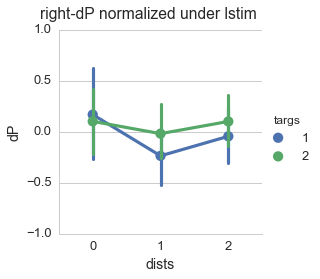

In [24]:
lnormRdPPlot = sns.factorplot(data=normData,x='dists',y='lstimRdP',hue='targs')
lnormRdPPlot.fig.suptitle('right-dP normalized under lstim')
lnormRdPPlot.set_axis_labels('dists', 'dP')
lnormRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(-1, 1)

(-1, 1)

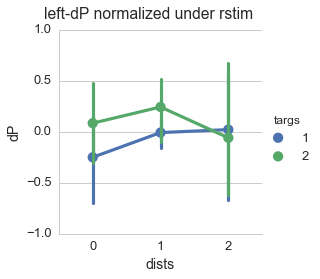

In [25]:
rnormLdPPlot = sns.factorplot(data=normData,x='dists',y='rstimLdP',hue='targs')
rnormLdPPlot.fig.suptitle('left-dP normalized under rstim')
rnormLdPPlot.set_axis_labels('dists', 'dP')
rnormLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(-1, 1)

(-1, 1)

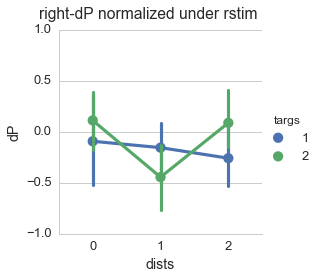

In [26]:
rnormRdPPlot = sns.factorplot(data=normData,x='dists',y='rstimRdP',hue='targs')
rnormRdPPlot.fig.suptitle('right-dP normalized under rstim')
rnormRdPPlot.set_axis_labels('dists', 'dP')
rnormRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(-1, 1)